In [1]:
%matplotlib inline
#Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder

In [2]:
catalog.list()

['train', 'test', 'X', 'Y', 'test_num', 'predict', 'parameters']

## Leitura e limpeza dos dados

In [38]:
titanic = pd.read_csv('/home/gabsiston/codes/desafio_DS_LH/titanic-survival-classification/data/01_raw/train.csv')

In [40]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [41]:
titanic.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [43]:
count_null_values_age = titanic['Age'].isnull().value_counts(normalize=True)
print(count_null_values_age)

False    0.801347
True     0.198653
Name: Age, dtype: float64


In [44]:
age_median = titanic['Age'].median()
print(age_median)

28.0


In [45]:
titanic['Age'] = titanic['Age'].fillna(age_median)
titanic.head(10)
train = titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [46]:
count_null_values_cabin = titanic['Cabin'].isnull().value_counts(normalize=True)
print(count_null_values_cabin)

True     0.771044
False    0.228956
Name: Cabin, dtype: float64


In [47]:
titanic = titanic.drop(columns=['Cabin','Ticket', 'PassengerId'])
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


## Análise Exploratória

In [48]:
#Verificando os valores da coluna idade, contando o número de pessoas por idade e organizando o índice
idades = titanic["Age"].value_counts()
#print(idades)
idades.sort_index()

0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 88, dtype: int64

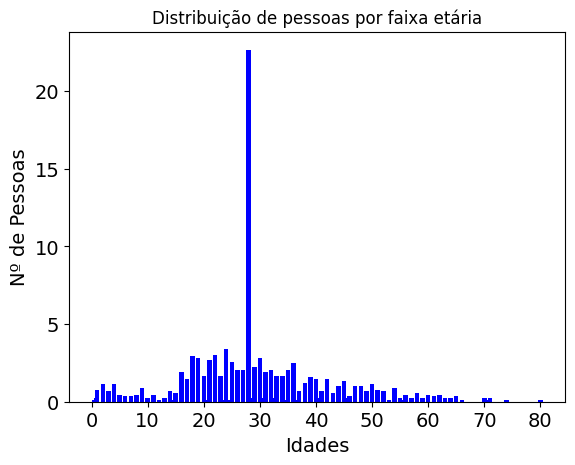

88


In [49]:
#Representando graficamente o número de pessoas por idade para analisar que idades são mais recorrentes nos dados
FS = 14
plt.figure()
x=idades.keys()
y1=idades.values
y1 = 100*y1/sum(y1)
plt.xlabel('Idades', size = FS)
plt.ylabel('Nº de Pessoas', size = FS)
plt.title('Distribuição de pessoas por faixa etária')
plt.bar(x, y1, color='b')

plt.yticks(size=FS)
plt.xticks(size=FS)

plt.show()
print(len(x))

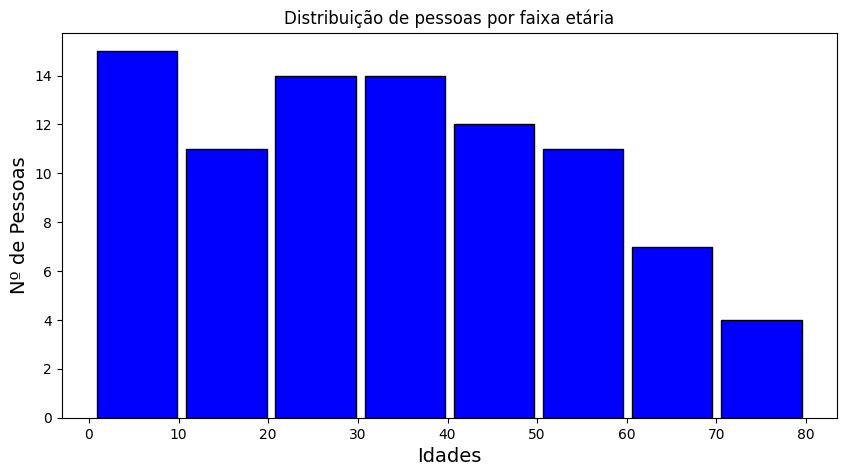

In [50]:
#Agrupando por faixas etárias
g, ax = plt.subplots(figsize = (10,5))

plt.xlabel('Idades', size = FS)
plt.ylabel('Nº de Pessoas', size = FS)
plt.title('Distribuição de pessoas por faixa etária')

ax.hist(idades.keys(), bins=8, rwidth=0.9,
         color = 'blue', edgecolor = 'black')

plt.show()

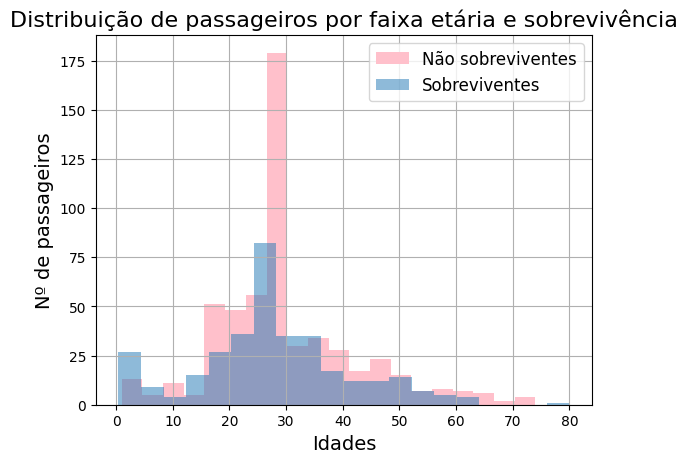

In [51]:
titanic[titanic['Survived'] == 0]['Age'].hist(color='pink', bins=20, label='Não sobreviventes')
titanic[titanic['Survived'] == 1]['Age'].hist(alpha=0.5, bins=20, label='Sobreviventes')

# Adicionando rótulos e título ao gráfico
plt.xlabel('Idades', size=14)
plt.ylabel('Nº de passageiros', size=14)
plt.title('Distribuição de passageiros por faixa etária e sobrevivência', size=16)

# Adicionando legenda ao gráfico
plt.legend(fontsize=12)

plt.show()

In [52]:
#Criando uma função pra classificar as idades
def get_age_range(x):
    if x<12:
        return 'Kid'
    elif x<18:
        return 'Young'
    elif x<45:
        return 'Adult'
    elif x<100:
        return 'Elderly'
    else:
        return x

In [53]:
#Adicionando as classes ao dataset
titanic['age_classification'] = titanic['Age'].apply(get_age_range)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,age_classification
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Adult
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Adult
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,Adult
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Adult


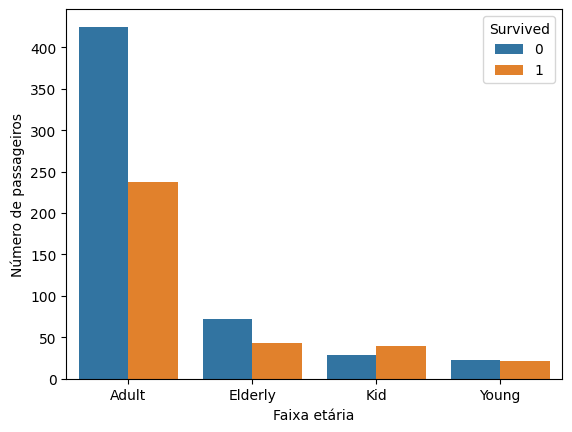

In [54]:
#Associando as classes de idade com a coluna 'Survived' para saber a distribuição de sobrevivência de acordo com a idade
# Cria o gráfico countplot
ax = sns.countplot(data=titanic, x='age_classification', hue='Survived')

# Ajusta o nome dos eixos
ax.set_xlabel('Faixa etária')
ax.set_ylabel('Número de passageiros')

# Mostra o gráfico
plt.show()

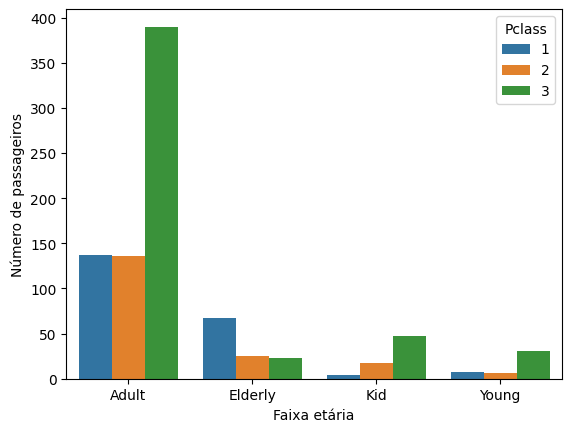

In [55]:
#Associando as classes de idade com a coluna 'Pclass' para saber a distribuição de idades de acordo com a classe do passageiro
# Cria o gráfico countplot
ax = sns.countplot(data=titanic, x='age_classification', hue='Pclass')

# Ajusta o nome dos eixos
ax.set_xlabel('Faixa etária')
ax.set_ylabel('Número de passageiros')

# Mostra o gráfico
plt.show()

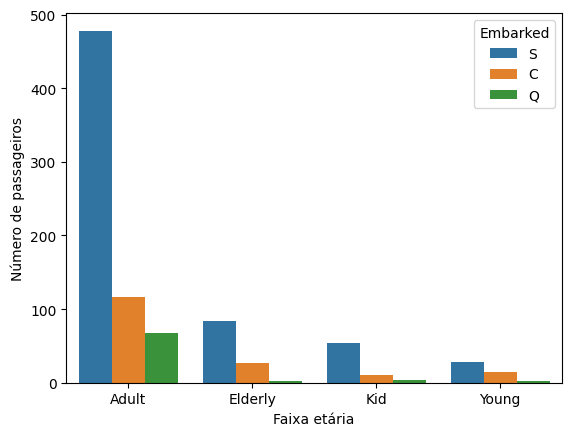

In [56]:
#Associando as classes de idade com a coluna 'Embarked' para saber a distribuição de idades de acordo com o local de embarque dos passageiros
# Cria o gráfico countplot
ax = sns.countplot(data=titanic, x='age_classification', hue='Embarked')

# Ajusta o nome dos eixos
ax.set_xlabel('Faixa etária')
ax.set_ylabel('Número de passageiros')

# Mostra o gráfico
plt.show()


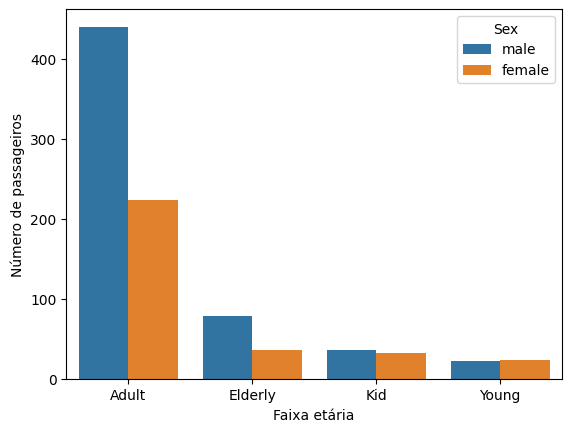

In [57]:
#Associando as classes de idade com a coluna 'Sex' para saber a distribuição de idades de acordo com o sexo dos passageiros
# Cria o gráfico countplot
ax = sns.countplot(data=titanic, x='age_classification', hue='Sex')

# Ajusta o nome dos eixos
ax.set_xlabel('Faixa etária')
ax.set_ylabel('Número de passageiros')

# Mostra o gráfico
plt.show()

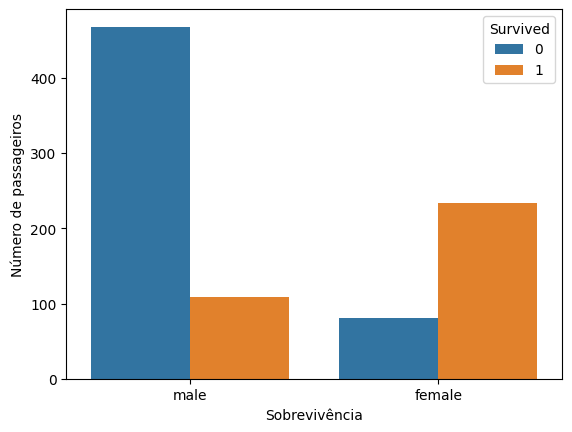

In [58]:
ax = sns.countplot(data=titanic, x='Sex', hue='Survived', hue_order={0: 'Não sobreviveu', 1: 'Sobreviveu'})

# Ajusta o nome dos eixos
ax.set_xlabel('Sobrevivência')
ax.set_ylabel('Número de passageiros')

# Mostra o gráfico
plt.show()

In [59]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,age_classification
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Adult
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,Adult
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Elderly
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Kid
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Adult
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Young


In [60]:
#titanic['Pronouns'] = titanic['Name'].apply(lambda x: x.split(', ')[1].split('.')[0])

In [61]:
#titanic

In [62]:
titanic = titanic.drop(columns=['age_classification', 'Name'])

In [63]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## Tratamento conjunto de test

In [178]:
test = pd.read_csv('/home/gabsiston/codes/desafio_DS_LH/titanic-survival-classification/data/01_raw/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [179]:
test.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [180]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [181]:
count_null_values_age = test['Age'].isnull().value_counts(normalize=True)
print(count_null_values_age)

False    0.794258
True     0.205742
Name: Age, dtype: float64


In [182]:
age_median = test['Age'].median()
print(age_median)

27.0


In [183]:
test['Age'] = test['Age'].fillna(age_median)
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [184]:
count_null_values_cabin = test['Cabin'].isnull().value_counts(normalize=True)
print(count_null_values_cabin)

True     0.782297
False    0.217703
Name: Cabin, dtype: float64


In [185]:
test = test.drop(columns=['Cabin','Ticket', 'PassengerId'])
test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
5,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,9.2250,S
6,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q
7,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,29.0000,S
8,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C
9,3,"Davies, Mr. John Samuel",male,21.0,2,0,24.1500,S


In [186]:
test.isnull().sum(axis=0)

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [188]:
test = test.dropna(subset=['Fare']).reset_index(drop=True)

In [189]:
test.isnull().sum(axis=0)

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [190]:
#Verificando os valores da coluna idade, contando o número de pessoas por idade e organizando o índice
idades = test["Age"].value_counts()
#print(idades)
idades.sort_index()

0.17     1
0.33     1
0.75     1
0.83     1
0.92     1
        ..
62.00    1
63.00    2
64.00    3
67.00    1
76.00    1
Name: Age, Length: 78, dtype: int64

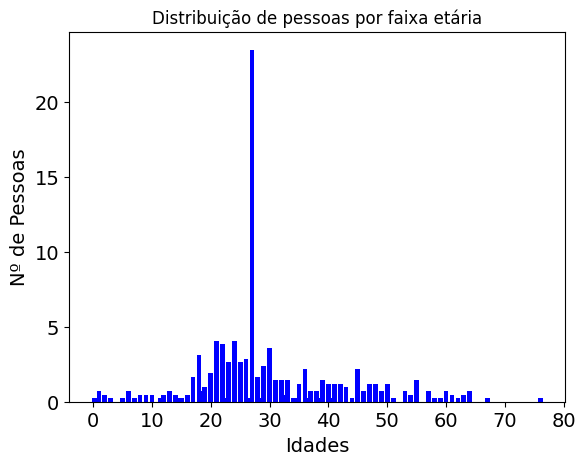

78


In [191]:
#Representando graficamente o número de pessoas por idade para analisar que idades são mais recorrentes nos dados
FS = 14
plt.figure()
x=idades.keys()
y1=idades.values
y1 = 100*y1/sum(y1)
plt.xlabel('Idades', size = FS)
plt.ylabel('Nº de Pessoas', size = FS)
plt.title('Distribuição de pessoas por faixa etária')
plt.bar(x, y1, color='b')

plt.yticks(size=FS)
plt.xticks(size=FS)

plt.show()
print(len(x))

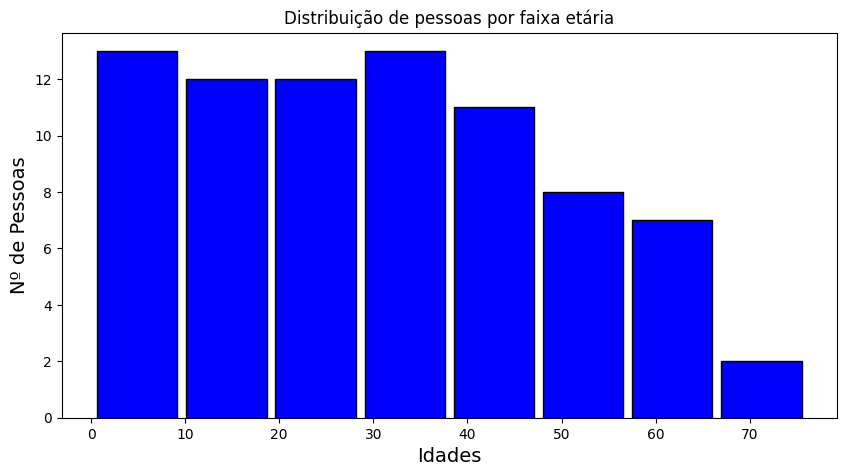

In [192]:
#Agrupando por faixas etárias
g, ax = plt.subplots(figsize = (10,5))

plt.xlabel('Idades', size = FS)
plt.ylabel('Nº de Pessoas', size = FS)
plt.title('Distribuição de pessoas por faixa etária')

ax.hist(idades.keys(), bins=8, rwidth=0.9,
         color = 'blue', edgecolor = 'black')

plt.show()

In [193]:
#Adicionando as classes ao dataset
test['age_classification'] = test['Age'].apply(get_age_range)
test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,age_classification
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Adult
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Elderly
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Elderly
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Adult
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Adult
...,...,...,...,...,...,...,...,...,...
412,3,"Spector, Mr. Woolf",male,27.0,0,0,8.0500,S,Adult
413,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,Adult
414,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,Adult
415,3,"Ware, Mr. Frederick",male,27.0,0,0,8.0500,S,Adult


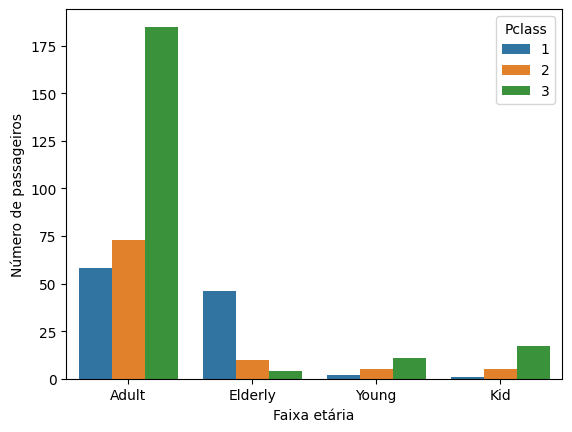

In [194]:
#Associando as classes de idade com a coluna 'Pclass' para saber a distribuição de idades de acordo com a classe do passageiro
# Cria o gráfico countplot
ax = sns.countplot(data=test, x='age_classification', hue='Pclass')

# Ajusta o nome dos eixos
ax.set_xlabel('Faixa etária')
ax.set_ylabel('Número de passageiros')

# Mostra o gráfico
plt.show()

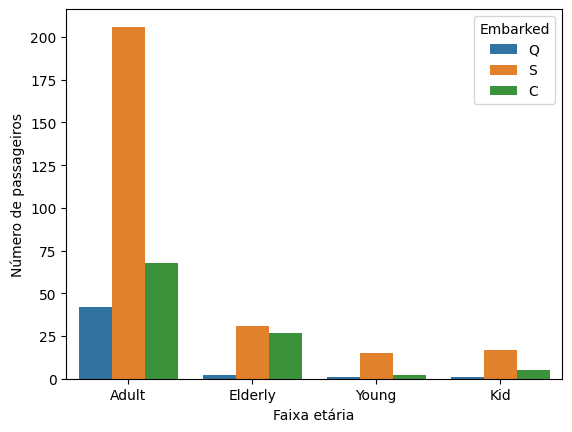

In [195]:
#Associando as classes de idade com a coluna 'Embarked' para saber a distribuição de idades de acordo com o local de embarque dos passageiros
# Cria o gráfico countplot
ax = sns.countplot(data=test, x='age_classification', hue='Embarked')

# Ajusta o nome dos eixos
ax.set_xlabel('Faixa etária')
ax.set_ylabel('Número de passageiros')

# Mostra o gráfico
plt.show()


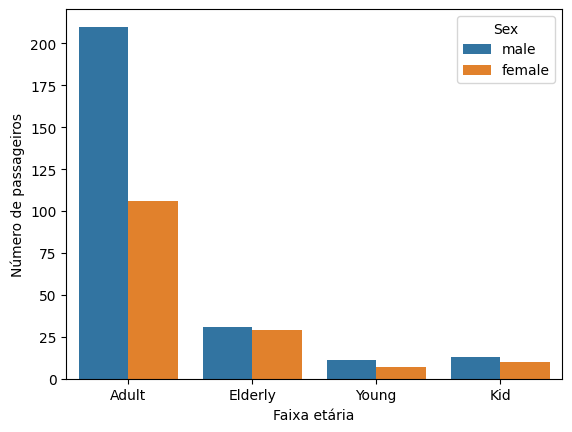

In [196]:
#Associando as classes de idade com a coluna 'Sex' para saber a distribuição de idades de acordo com o sexo dos passageiros
# Cria o gráfico countplot
ax = sns.countplot(data=test, x='age_classification', hue='Sex')

# Ajusta o nome dos eixos
ax.set_xlabel('Faixa etária')
ax.set_ylabel('Número de passageiros')

# Mostra o gráfico
plt.show()

In [197]:
test = test.drop(columns=['age_classification', 'Name'])

In [198]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
412,3,male,27.0,0,0,8.0500,S
413,1,female,39.0,0,0,108.9000,C
414,3,male,38.5,0,0,7.2500,S
415,3,male,27.0,0,0,8.0500,S


## Funções de Preparação dos Dados e de divisão dos conjuntos de entrada e saida

In [199]:
#Selecionando e codificando as colunas que serão utilizadas
def prepareData(df):
    df = df[['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
    df_num =  pd.DataFrame(columns=['Survived','Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
    df_num = pd.get_dummies(data = df,
        columns = ['Sex', 'Embarked'],
        prefix = ['Sex', 'Embarked']
    )
    return df_num

In [200]:
#Divindo a entrada e saída para o modelo
def dataSplit(df):

    y = np.asarray(list(df['Survived']))
    X = df.drop('Survived', axis=1)

    return X,y

In [201]:
#Aplicando as funções
titanic_num = prepareData(titanic)

X, y = dataSplit(titanic_num)
print(X.shape, y.shape)

(891, 10) (891,)


In [202]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


## Treinamento do Modelo usando KFold para divisão dos conjuntos de Treino e Validação

In [203]:
#Importando as bibliotecas do modelo e métricas de performances
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

#Treinamento do modelo
mean_acc=0
kf = KFold(n_splits=10)
kf.get_n_splits(X)
clf = RandomForestClassifier(max_features= "sqrt",  random_state=3232)
bestModel = None
bestAcc = 0
i = 0
for train_index, val_index in kf.split(X):
    i += 1
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_val)
    acc = (100*accuracy_score(y_val, predictions))
    print("Fold: %i" % i  + " - Accuracy: %s%%" % acc)
    if acc > bestAcc:
        bestModel = clf
        bestAcc = acc
    mean_acc += acc
    #print(classification_report(y_val, predictions))
print("Acuracia Média: %s%%" % (mean_acc/i))
print("Melhor Acuracia %s%%" % bestAcc)

Fold: 1 - Accuracy: 77.77777777777779%
Fold: 2 - Accuracy: 82.02247191011236%
Fold: 3 - Accuracy: 79.7752808988764%
Fold: 4 - Accuracy: 79.7752808988764%
Fold: 5 - Accuracy: 85.39325842696628%
Fold: 6 - Accuracy: 84.26966292134831%
Fold: 7 - Accuracy: 77.52808988764045%
Fold: 8 - Accuracy: 78.65168539325843%
Fold: 9 - Accuracy: 84.26966292134831%
Fold: 10 - Accuracy: 86.51685393258427%
Acuracia Média: 81.59800249687889%
Melhor Acuracia 86.51685393258427%


## Testando o modelo

In [204]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
412,3,male,27.0,0,0,8.0500,S
413,1,female,39.0,0,0,108.9000,C
414,3,male,38.5,0,0,7.2500,S
415,3,male,27.0,0,0,8.0500,S


In [205]:
def prepareDataTest(df):
    df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
    df_num =  pd.DataFrame(columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'])
    df_num = pd.get_dummies(data = df,
        columns = ['Sex', 'Embarked'],
        prefix = ['Sex', 'Embarked']
    )
    return df_num

In [206]:
X_test = prepareDataTest(test)
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
412,3,27.0,0,0,8.0500,0,1,0,0,1
413,1,39.0,0,0,108.9000,1,0,1,0,0
414,3,38.5,0,0,7.2500,0,1,0,0,1
415,3,27.0,0,0,8.0500,0,1,0,0,1


In [209]:
#Usando o melhor modelo para predição
predictions_test = bestModel.predict(X_test)
X_test['predictedValues'] = predictions_test

In [210]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,predictedValues
0,3,34.5,0,0,7.8292,0,1,0,1,0,0
1,3,47.0,1,0,7.0000,1,0,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,1,0,0
3,3,27.0,0,0,8.6625,0,1,0,0,1,0
4,3,22.0,1,1,12.2875,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
412,3,27.0,0,0,8.0500,0,1,0,0,1,0
413,1,39.0,0,0,108.9000,1,0,1,0,0,1
414,3,38.5,0,0,7.2500,0,1,0,0,1,0
415,3,27.0,0,0,8.0500,0,1,0,0,1,0


In [211]:
# Gerando o Dataset Final e salvando no arquivo csv
df_result = X_test['predictedValues']
df_result.to_csv('predicted.csv')